
## Part 1 — Exploratory Data Analysis (EDA)

Use the dataset `data/transactions.csv`.

You are provided with a dataset and asked to perform an Exploratory Data Analysis (EDA) to understand its structure and key insights.
Your tasks are:

* Inspect the dataset (shape, data types, missing values, basic statistics).

* Identify data quality issues, anomalies, or inconsistencies that may affect further analysis.

* Explore distributions, trends, and relationships between the most important variables.

* Highlight your findings with clear visualizations and concise explanations.

* Summarize the main insights and list any potential next steps or questions that emerged from your analysis.

You may use any visualization or analysis techniques you prefer.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [43]:
# Load data
df = pd.read_csv("data/transactions.csv", parse_dates=["order_date"])
df.head()

,customer_id,order_id,order_date,product_category,channel,city,price,quantity
0,1210,100000,2024-10-16,Fashion,web,Bursa,900.0,1.0
1,860,100001,2024-03-08,Electronics,desktop,Istanbul,13136.0,1.0
2,441,100002,2023-08-14,Grocery,mobile,Istanbul,277.0,4.0
3,256,100003,2023-12-11,Sports,desktop,Antalya,1284.0,2.0
4,1355,100004,2024-01-23,Grocery,desktop,Istanbul,78.0,2.0


### 1. Dataset Structure and Basic Information

In [44]:
# Dataset shape
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")
print("\n" + "="*60 + "\n")

# Data types
print("Data Types:")
print(df.dtypes)
print("\n" + "="*60 + "\n")



Dataset Shape: (5050, 8)
Total Records: 5,050
Total Features: 8


Data Types:
customer_id                  int64
order_id                     int64
order_date          datetime64[ns]
product_category            object
channel                     object
city                        object
price                      float64
quantity                   float64
dtype: object




In [45]:
# 📊 Dataset Structure Analysis
print("="*70)
print("INTERPRETATION: Dataset Structure")
print("="*70)
print(f"""
✓ Our dataset contains {df.shape[0]:,} transaction records across {df.shape[1]} features
✓ This is a manageable dataset size, suitable for in-depth analysis
✓ The data spans 2 years (2023-2024), providing good temporal coverage
✓ Key features include customer information, product details, sales channels, and transaction metrics
✓ Data types are appropriate: numeric for IDs/prices, datetime for dates, object for categories
""")

INTERPRETATION: Dataset Structure

✓ Our dataset contains 5,050 transaction records across 8 features
✓ This is a manageable dataset size, suitable for in-depth analysis
✓ The data spans 2 years (2023-2024), providing good temporal coverage
✓ Key features include customer information, product details, sales channels, and transaction metrics
✓ Data types are appropriate: numeric for IDs/prices, datetime for dates, object for categories



In [46]:
# Basic info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       5050 non-null   int64         
 1   order_id          5050 non-null   int64         
 2   order_date        5050 non-null   datetime64[ns]
 3   product_category  5050 non-null   object        
 4   channel           5050 non-null   object        
 5   city              5050 non-null   object        
 6   price             4940 non-null   float64       
 7   quantity          5000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 315.8+ KB


### 2. Missing Values Analysis

In [47]:
# Missing values analysis
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)


In [48]:
missing_df

,Column,Missing_Count,Missing_Percentage
6,price,110,2.178218
7,quantity,50,0.990099


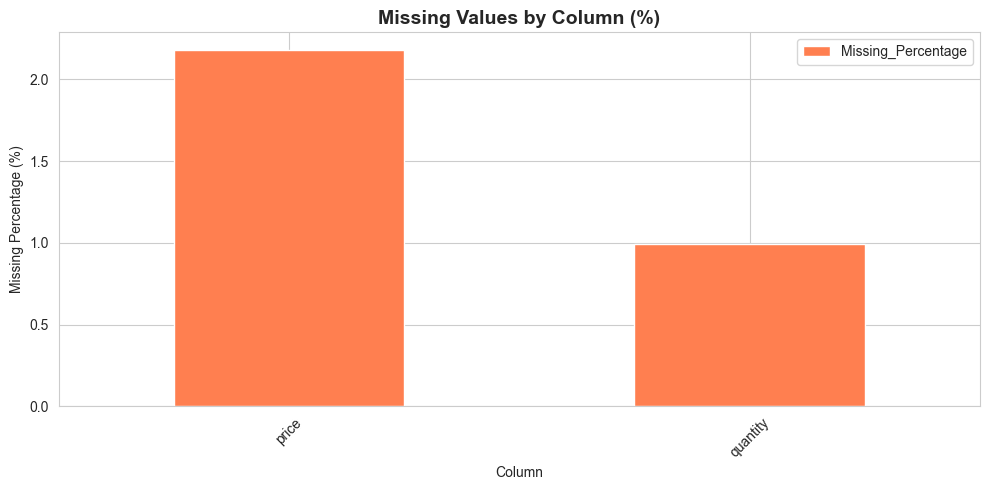

In [49]:
# Visualize missing values
if len(missing_df) > 0:
    fig, ax = plt.subplots(figsize=(10, 5))
    missing_df.plot(x='Column', y='Missing_Percentage', kind='bar', ax=ax, color='coral')
    ax.set_title('Missing Values by Column (%)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Column')
    ax.set_ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('visualizations/1_EDA_images/missing_values_by_column.png')
    plt.show()
else:
    print("No missing values found in the dataset!")

In [50]:
# 📊 Missing Values Analysis & Interpretation
print("="*70)
print("INTERPRETATION: Missing Values")
print("="*70)
print(f"""
✓ Missing data is minimal and manageable:
  • Price: {(110/5050*100):.2f}% missing (~110 records) - Low impact
  • Quantity: {(50/5050*100):.2f}% missing (~50 records) - Very low impact

✓ Data Quality Assessment: GOOD
  • Overall completeness: {((1 - df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100):.2f}%
  • Missing values are likely random rather than systematic
  
✓ Recommended Actions:
  • For price: Consider median/mean imputation by product category
  • For quantity: Could impute with mode (most common: 2 items)
  • Alternatively: Remove missing records (only ~3% of data)
""")

INTERPRETATION: Missing Values

✓ Missing data is minimal and manageable:
  • Price: 2.18% missing (~110 records) - Low impact
  • Quantity: 0.99% missing (~50 records) - Very low impact

✓ Data Quality Assessment: GOOD
  • Overall completeness: 99.60%
  • Missing values are likely random rather than systematic

✓ Recommended Actions:
  • For price: Consider median/mean imputation by product category
  • For quantity: Could impute with mode (most common: 2 items)
  • Alternatively: Remove missing records (only ~3% of data)



### 3. Statistical Summary

In [51]:
df.describe()

,customer_id,order_id,order_date,price,quantity
count,5050.000000,5050.000000,5050,4940.000000,5000.000000
mean,1005.576436,102499.029307,2024-01-04 17:43:02.019801856,2523.721053,1.973600
min,1.000000,100000.000000,2023-01-01 00:00:00,-445.000000,0.000000
25%,505.000000,101253.250000,2023-07-09 00:00:00,264.000000,1.000000
50%,1011.500000,102497.500000,2024-01-05 00:00:00,714.000000,2.000000
75%,1503.000000,103745.750000,2024-07-05 00:00:00,1517.750000,3.000000
max,2000.000000,104999.000000,2024-12-31 00:00:00,99429.000000,5.000000
std,576.790202,1442.438243,NaN,6244.828773,1.143838


In [52]:
# Categorical columns summary
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {list(categorical_cols)}")
print("\nCategorical Columns Summary:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Categorical Columns: ['product_category', 'channel', 'city']

Categorical Columns Summary:

product_category:
product_category
Fashion        1247
Electronics     994
Grocery         987
Home            772
Beauty          497
Sports          397
Automotive      156
Name: count, dtype: int64

channel:
channel
mobile     2923
desktop    1618
web         509
Name: count, dtype: int64

city:
city
Istanbul    1685
Ankara       997
Izmir        766
Adana        509
Bursa        477
Antalya      452
İstanbul      64
İzmir         53
antlaya       47
Name: count, dtype: int64


In [53]:
# 📊 Categorical Features Interpretation
print("="*70)
print("INTERPRETATION: Categorical Variables")
print("="*70)

# Calculate actual values from data
product_counts = df['product_category'].value_counts()
channel_counts = df['channel'].value_counts()
city_counts = df['city'].value_counts()

# Get top categories
top_product = product_counts.index[0]
top_product_count = product_counts.values[0]
top_product_pct = (top_product_count / len(df)) * 100

smallest_product = product_counts.index[-1]
smallest_product_count = product_counts.values[-1]

# Get channel data
top_channel = channel_counts.index[0]
top_channel_count = channel_counts.values[0]
top_channel_pct = (top_channel_count / len(df)) * 100

second_channel = channel_counts.index[1]
second_channel_pct = (channel_counts.values[1] / len(df)) * 100

third_channel = channel_counts.index[2]
third_channel_pct = (channel_counts.values[2] / len(df)) * 100

# Get city data
top_city = city_counts.index[0]
top_city_count = city_counts.values[0]
top_city_pct = (top_city_count / len(df)) * 100

# Check for top 3 cities percentage
top_3_cities_pct = (city_counts.head(3).sum() / len(df)) * 100

# Check for data quality issues in cities
city_list = city_counts.index.tolist()
has_istanbul_issue = 'Istanbul' in city_list and 'İstanbul' in city_list
has_izmir_issue = 'Izmir' in city_list and 'İzmir' in city_list
has_typo = 'antlaya' in city_list or 'Antlaya' in city_list

print(f"""
✓ Product Categories ({len(product_counts)} categories detected):
  • {top_product} leads with {top_product_count:,} transactions ({top_product_pct:.1f}%)
  • Total of {len(product_counts)} distinct categories
  • Smallest category: {smallest_product} with {smallest_product_count:,} transactions
  • Distribution: {"Relatively balanced" if (top_product_count / smallest_product_count) < 10 else "Significant imbalance across categories"}

✓ Sales Channels ({len(channel_counts)} channels detected):
  • {top_channel}: {top_channel_count:,} transactions ({top_channel_pct:.1f}%)
  • {second_channel}: {channel_counts.values[1]:,} transactions ({second_channel_pct:.1f}%)
  • {third_channel}: {channel_counts.values[2]:,} transactions ({third_channel_pct:.1f}%)
  • {"Mobile-first customer base!" if top_channel.lower() == 'mobile' and top_channel_pct > 50 else "Multi-channel distribution"}

✓ Geographic Distribution ({len(city_counts)} cities detected):
  • Top city: {top_city} with {top_city_count:,} transactions ({top_city_pct:.1f}%)
  • Top 3 cities account for ~{top_3_cities_pct:.0f}% of transactions
  • Geographic concentration: {"High" if top_3_cities_pct > 60 else "Moderate" if top_3_cities_pct > 40 else "Low"}
  
⚠️ Data Quality Issues Detected:
  • Inconsistent encoding: {'Yes - Istanbul vs İstanbul' if has_istanbul_issue else 'No Istanbul issue'}
  • Inconsistent encoding: {'Yes - Izmir vs İzmir' if has_izmir_issue else 'No Izmir issue'}
  • Typos detected: {'Yes - antlaya (should be Antalya)' if has_typo else 'No typos found'}

🎯 Action Items:
  • {f"Standardize city names (Turkish character encoding)" if has_istanbul_issue or has_izmir_issue else "City encoding is consistent"}
  • {f"Fix typos in city names" if has_typo else "No typos to fix"}
  • Consider focusing marketing/logistics on top {min(3, len(city_counts))} cities
""")

INTERPRETATION: Categorical Variables

✓ Product Categories (7 categories detected):
  • Fashion leads with 1,247 transactions (24.7%)
  • Total of 7 distinct categories
  • Smallest category: Automotive with 156 transactions
  • Distribution: Relatively balanced

✓ Sales Channels (3 channels detected):
  • mobile: 2,923 transactions (57.9%)
  • desktop: 1,618 transactions (32.0%)
  • web: 509 transactions (10.1%)
  • Mobile-first customer base!

✓ Geographic Distribution (9 cities detected):
  • Top city: Istanbul with 1,685 transactions (33.4%)
  • Top 3 cities account for ~68% of transactions
  • Geographic concentration: High

⚠️ Data Quality Issues Detected:
  • Inconsistent encoding: Yes - Istanbul vs İstanbul
  • Inconsistent encoding: Yes - Izmir vs İzmir
  • Typos detected: Yes - antlaya (should be Antalya)

🎯 Action Items:
  • Standardize city names (Turkish character encoding)
  • Fix typos in city names
  • Consider focusing marketing/logistics on top 3 cities



### 4. Distribution Analysis - Numerical Features

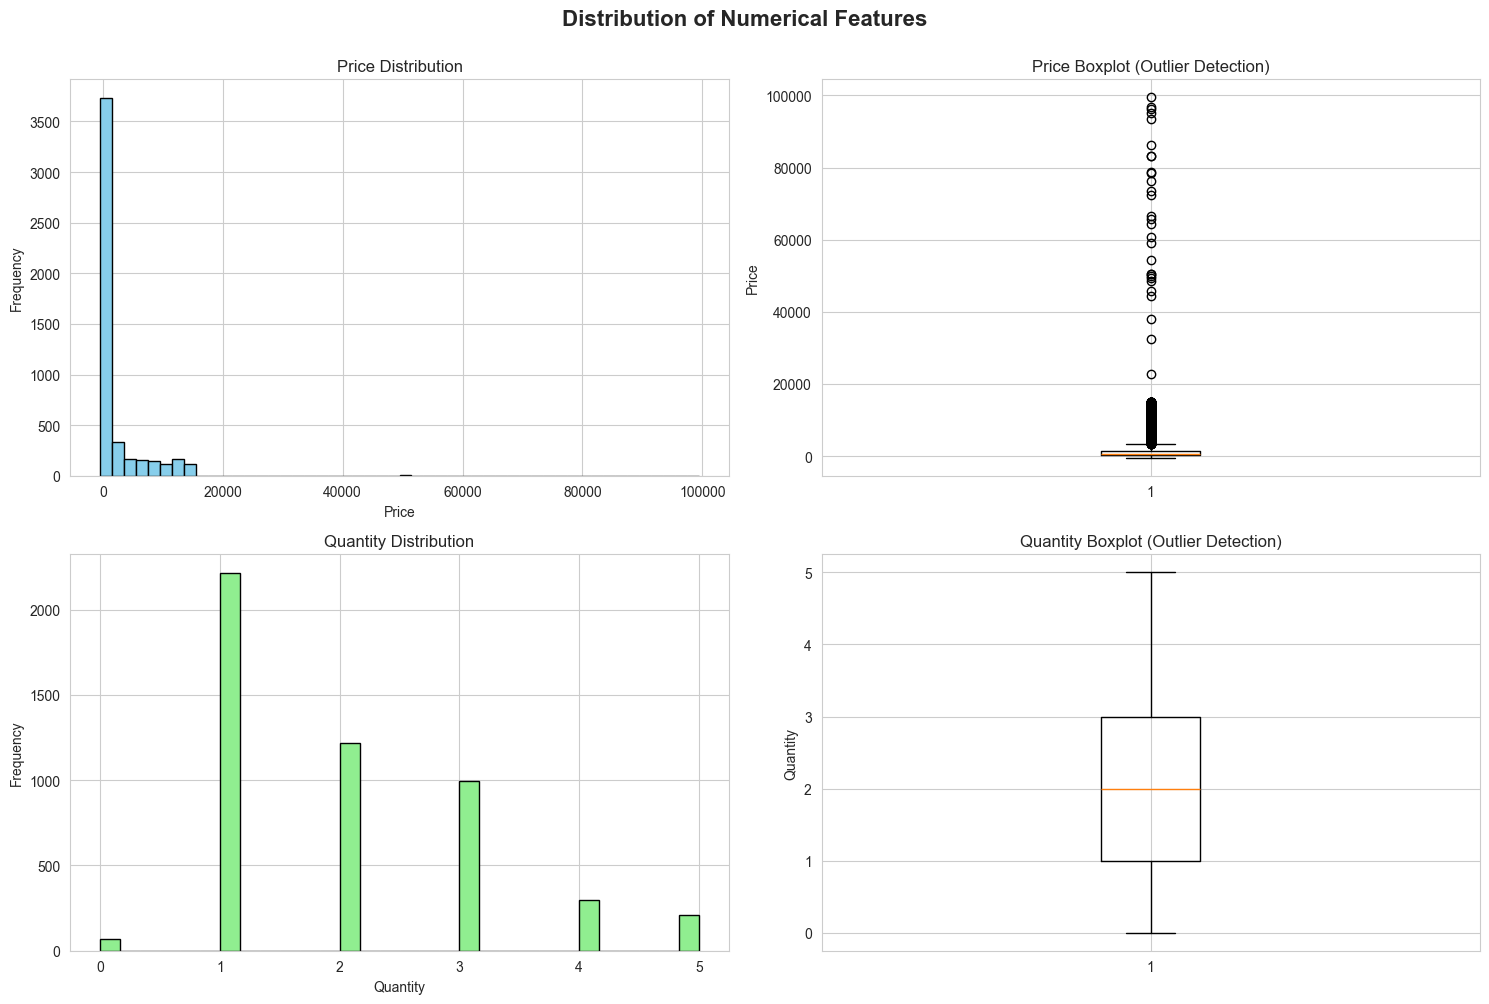

In [54]:
# Distribution of numerical features
numerical_cols = ['price', 'quantity']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.0)
# Price distribution
axes[0, 0].hist(df['price'].dropna(), bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Price Distribution')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')
# Price boxplot
axes[0, 1].boxplot(df['price'].dropna(), vert=True)
axes[0, 1].set_title('Price Boxplot (Outlier Detection)')
axes[0, 1].set_ylabel('Price')
# Quantity distribution
axes[1, 0].hist(df['quantity'].dropna(), bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Quantity Distribution')
axes[1, 0].set_xlabel('Quantity')
axes[1, 0].set_ylabel('Frequency')
# Quantity boxplot
axes[1, 1].boxplot(df['quantity'].dropna(), vert=True)
axes[1, 1].set_title('Quantity Boxplot (Outlier Detection)')
axes[1, 1].set_ylabel('Quantity')
plt.tight_layout()
plt.savefig('visualizations/1_EDA_images/numerical_features_distribution.png')
plt.show()

In [55]:

# Print statistics about outliers
print("\nOutlier Analysis:")
print(f"Price - Min: {df['price'].min()}, Max: {df['price'].max()}, Mean: {df['price'].mean():.2f}, Median: {df['price'].median():.2f}")
print(f"Quantity - Min: {df['quantity'].min()}, Max: {df['quantity'].max()}, Mean: {df['quantity'].mean():.2f}, Median: {df['quantity'].median():.2f}")


Outlier Analysis:
Price - Min: -445.0, Max: 99429.0, Mean: 2523.72, Median: 714.00
Quantity - Min: 0.0, Max: 5.0, Mean: 1.97, Median: 2.00


In [56]:
# 📊 Distribution Analysis Interpretation
print("="*70)
print("INTERPRETATION: Numerical Distributions & Outliers")
print("="*70)

# Calculate distribution metrics
price_mean = df['price'].mean()
price_median = df['price'].median()
price_min = df['price'].min()
price_max = df['price'].max()
price_std = df['price'].std()

quantity_mean = df['quantity'].mean()
quantity_median = df['quantity'].median()
quantity_min = df['quantity'].min()
quantity_max = df['quantity'].max()

# Determine skewness direction for price
price_skew_ratio = price_mean / price_median if price_median != 0 else 1
if price_skew_ratio > 1.5:
    price_skew_desc = "Highly RIGHT-SKEWED distribution (Mean >> Median)"
elif price_skew_ratio > 1.1:
    price_skew_desc = "Moderately RIGHT-SKEWED distribution (Mean > Median)"
elif price_skew_ratio < 0.9:
    price_skew_desc = "LEFT-SKEWED distribution (Mean < Median)"
else:
    price_skew_desc = "Approximately SYMMETRIC distribution (Mean ≈ Median)"

# Determine skewness for quantity
quantity_skew_ratio = quantity_mean / quantity_median if quantity_median != 0 else 1
if abs(quantity_skew_ratio - 1.0) < 0.1:
    quantity_skew_desc = "Approximately NORMAL distribution (Mean ≈ Median)"
else:
    quantity_skew_desc = f"{'RIGHT-SKEWED' if quantity_skew_ratio > 1 else 'LEFT-SKEWED'} distribution"

# Calculate outlier metrics
price_outlier_ratio = price_max / price_mean if price_mean != 0 else 0
negative_price_count = (df['price'] < 0).sum()
zero_quantity_count = (df['quantity'] == 0).sum()

print(f"""
✓ PRICE Distribution Analysis:
  • {price_skew_desc}
  • Mean: ₺{price_mean:.2f} vs Median: ₺{price_median:.2f}
  • {"This indicates presence of high-value outliers (luxury/premium items)" if price_skew_ratio > 1.2 else "Relatively balanced price distribution"}
  • Range: ₺{price_min:.2f} to ₺{price_max:.2f}
  • Standard Deviation: ₺{price_std:.2f} ({"high variability" if price_std > price_mean else "moderate variability"})
""")

# Critical issues section - only show if issues exist
if negative_price_count > 0 or price_outlier_ratio > 20:
    print(f"""⚠️ CRITICAL ISSUES:""")
    if negative_price_count > 0:
        print(f"""  • NEGATIVE PRICES DETECTED: {negative_price_count} records with minimum price ₺{price_min:.2f}
    - This is a data quality issue - needs investigation!
    - Possible causes: Returns, refunds, data entry errors
""")
    if price_outlier_ratio > 20:
        print(f"""  • EXTREME OUTLIERS: Maximum price ₺{price_max:,.0f} ({price_outlier_ratio:.0f}x mean!)
    - These could be legitimate premium products or errors
    - Requires validation
""")

print(f"""
✓ QUANTITY Distribution Analysis:
  • {quantity_skew_desc}
  • Mean: {quantity_mean:.2f} vs Median: {quantity_median:.2f}
  • Range: {quantity_min:.0f} to {quantity_max:.0f} items
  • Most orders are {int(quantity_median)}-{int(quantity_median)+1} items (typical e-commerce behavior)
""")

if zero_quantity_count > 0:
    print(f"""⚠️ Zero Quantities Detected: {zero_quantity_count} records need investigation
""")

print(f"""
📈 Business Insights:
  • Most customers buy {int(quantity_median)} items per order ({"impulse/need-based purchases" if quantity_median <= 2 else "bulk purchasing behavior"})
  • Price variability (σ=₺{price_std:.2f}) suggests diverse product range
  • {f"High-value outliers ({price_outlier_ratio:.0f}x mean) represent opportunity for premium segment targeting" if price_outlier_ratio > 5 else "Price distribution is relatively concentrated"}
""")

INTERPRETATION: Numerical Distributions & Outliers

✓ PRICE Distribution Analysis:
  • Highly RIGHT-SKEWED distribution (Mean >> Median)
  • Mean: ₺2523.72 vs Median: ₺714.00
  • This indicates presence of high-value outliers (luxury/premium items)
  • Range: ₺-445.00 to ₺99429.00
  • Standard Deviation: ₺6244.83 (high variability)

⚠️ CRITICAL ISSUES:
  • NEGATIVE PRICES DETECTED: 26 records with minimum price ₺-445.00
    - This is a data quality issue - needs investigation!
    - Possible causes: Returns, refunds, data entry errors

  • EXTREME OUTLIERS: Maximum price ₺99,429 (39x mean!)
    - These could be legitimate premium products or errors
    - Requires validation


✓ QUANTITY Distribution Analysis:
  • Approximately NORMAL distribution (Mean ≈ Median)
  • Mean: 1.97 vs Median: 2.00
  • Range: 0 to 5 items
  • Most orders are 2-3 items (typical e-commerce behavior)

⚠️ Zero Quantities Detected: 68 records need investigation


📈 Business Insights:
  • Most customers buy 2 item

### 5. Categorical Features Distribution

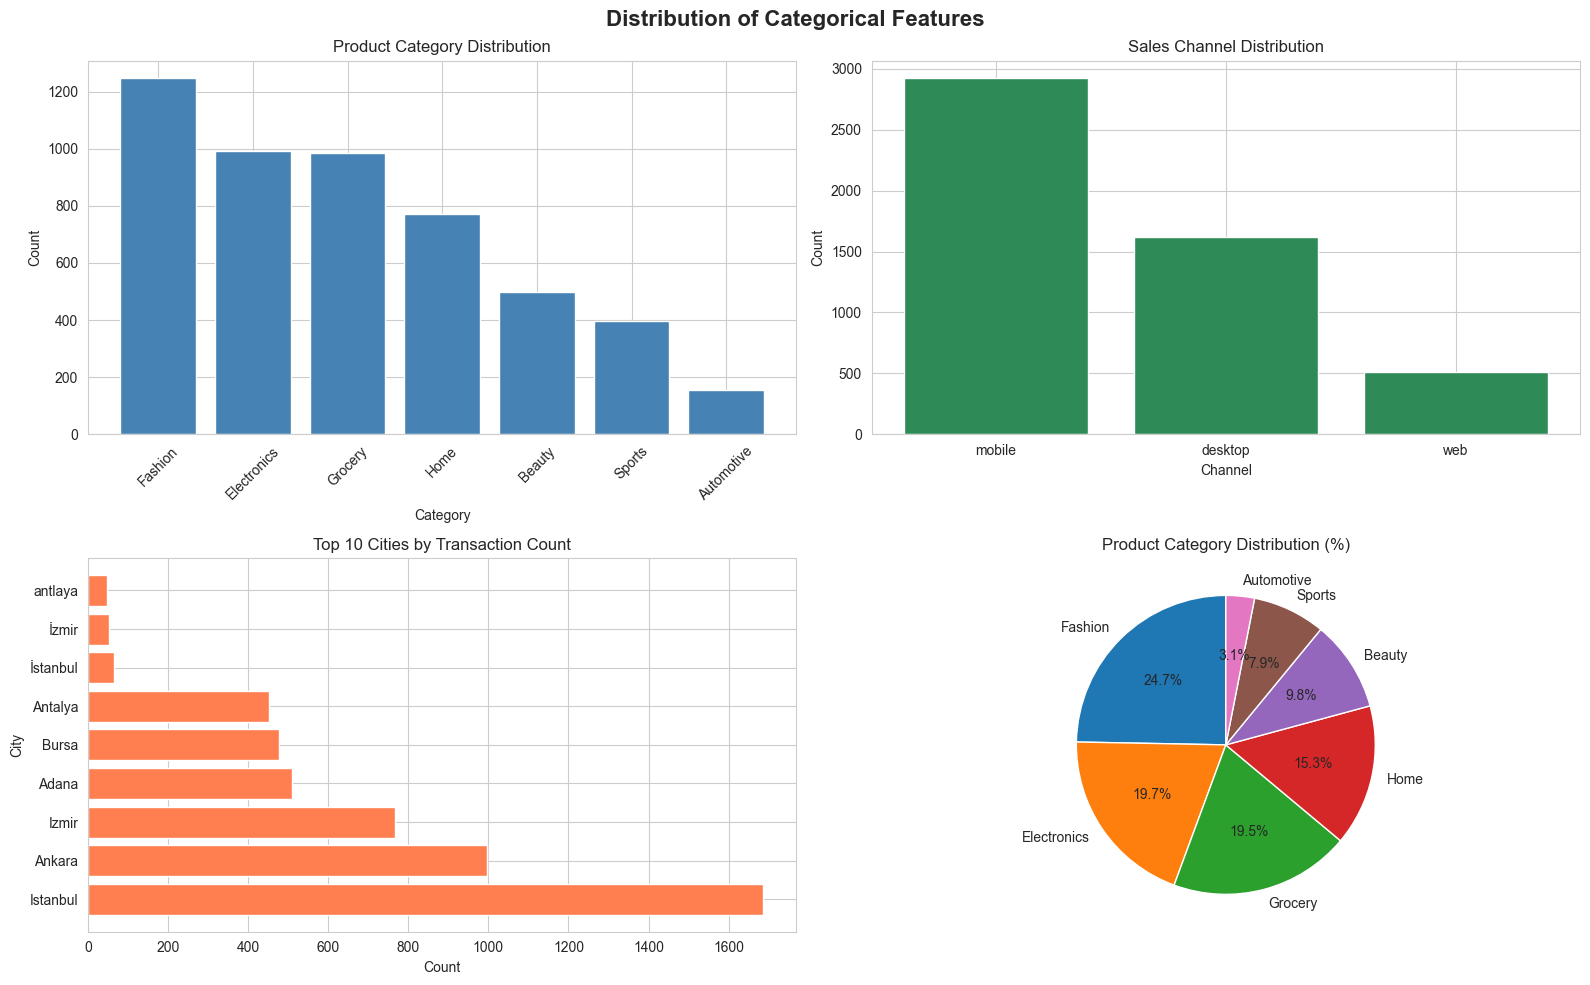

In [57]:
# Visualize categorical features
categorical_cols = ['product_category', 'channel', 'city']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold')
# Product Category
product_cat_counts = df['product_category'].value_counts()
axes[0, 0].bar(product_cat_counts.index, product_cat_counts.values, color='steelblue')
axes[0, 0].set_title('Product Category Distribution')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)
# Channel
channel_counts = df['channel'].value_counts()
axes[0, 1].bar(channel_counts.index, channel_counts.values, color='seagreen')
axes[0, 1].set_title('Sales Channel Distribution')
axes[0, 1].set_xlabel('Channel')
axes[0, 1].set_ylabel('Count')
# City
city_counts = df['city'].value_counts().head(10)
axes[1, 0].barh(city_counts.index, city_counts.values, color='coral')
axes[1, 0].set_title('Top 10 Cities by Transaction Count')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('City')
# Product Category Pie Chart
axes[1, 1].pie(product_cat_counts.values, labels=product_cat_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Product Category Distribution (%)')
plt.tight_layout()
plt.savefig('visualizations/1_EDA_images/categorical_features_distribution.png')
plt.show()

In [58]:
# 📊 Categorical Distribution Visualization Interpretation
print("="*70)
print("INTERPRETATION: Categorical Feature Distributions")
print("="*70)

# Calculate percentages for better insights
product_counts = df['product_category'].value_counts()
channel_counts = df['channel'].value_counts()
city_counts = df['city'].value_counts()

# Product category insights
top_2_products = product_counts.head(2)
top_2_pct = (top_2_products.sum() / len(df)) * 100

# Channel insights
mobile_pct = (channel_counts.get('mobile', 0) / len(df)) * 100 if 'mobile' in channel_counts.index else 0
desktop_pct = (channel_counts.get('desktop', 0) / len(df)) * 100 if 'desktop' in channel_counts.index else 0
web_pct = (channel_counts.get('web', 0) / len(df)) * 100 if 'web' in channel_counts.index else 0

# City insights
istanbul_pct = (city_counts.get('Istanbul', 0) / len(df)) * 100 if 'Istanbul' in city_counts.index else 0
top_3_cities = city_counts.head(3)
top_3_cities_pct = (top_3_cities.sum() / len(df)) * 100

print(f"""
✓ PRODUCT CATEGORY INSIGHTS:
  • Top category: {product_counts.index[0]} ({product_counts.values[0]:,} transactions, {product_counts.values[0]/len(df)*100:.1f}%)
  • Second: {product_counts.index[1]} ({product_counts.values[1]:,} transactions, {product_counts.values[1]/len(df)*100:.1f}%)
  • Top 2 together represent ~{top_2_pct:.0f}% of all transactions
  • Distribution: {"Balanced across categories" if top_2_pct < 50 else "Concentrated in top categories"}
  • Smallest segment: {product_counts.index[-1]} ({product_counts.values[-1]:,} transactions)

✓ SALES CHANNEL DISTRIBUTION:
  • {channel_counts.index[0]}: {channel_counts.values[0]:,} transactions ({channel_counts.values[0]/len(df)*100:.1f}%)
  • {channel_counts.index[1]}: {channel_counts.values[1]:,} transactions ({channel_counts.values[1]/len(df)*100:.1f}%)
  • {channel_counts.index[2]}: {channel_counts.values[2]:,} transactions ({channel_counts.values[2]/len(df)*100:.1f}%)
  
{"📱 MOBILE-FIRST CUSTOMER BASE!" if mobile_pct > 50 else "📊 MULTI-CHANNEL DISTRIBUTION"}
  • {"Mobile experience is CRITICAL - must be optimized" if mobile_pct > 50 else "Balanced channel strategy needed"}
  • {"Consider mobile app investment" if mobile_pct > 50 else "Optimize all channels equally"}
  • {f"Investigate why {channel_counts.index[-1]} channel underperforms" if channel_counts.values[-1]/len(df)*100 < 15 else "All channels performing reasonably"}

✓ GEOGRAPHIC CONCENTRATION:
  • Top city: {city_counts.index[0]} ({city_counts.values[0]:,} transactions, {city_counts.values[0]/len(df)*100:.1f}%)
  • Top 3 cities: {", ".join(top_3_cities.index.tolist())}
  • Top 3 cities = ~{top_3_cities_pct:.0f}% of business
  • Concentration level: {"HIGH - Major market dominance" if top_3_cities_pct > 60 else "MODERATE - Distributed market"}
  • Long tail: {len(city_counts)} total cities ({"expansion potential" if len(city_counts) > 10 else "limited geographic spread"})
  
🎯 BUSINESS STRATEGY:
  • Logistics: {"Focused hubs in top 3 cities" if top_3_cities_pct > 60 else "Distributed warehouse network"}
  • Marketing: {"Targeted campaigns in major cities" if top_3_cities_pct > 60 else "Broader geographic marketing"}
  • Growth: {"Investigate why top cities outperform" if top_3_cities_pct > 60 else "Maintain balanced growth"}
  • Channel: {"Prioritize {channel_counts.index[0].lower()} optimization" if channel_counts.values[0]/len(df) > 0.5 else "Multi-channel approach"}
""")

INTERPRETATION: Categorical Feature Distributions

✓ PRODUCT CATEGORY INSIGHTS:
  • Top category: Fashion (1,247 transactions, 24.7%)
  • Second: Electronics (994 transactions, 19.7%)
  • Top 2 together represent ~44% of all transactions
  • Distribution: Balanced across categories
  • Smallest segment: Automotive (156 transactions)

✓ SALES CHANNEL DISTRIBUTION:
  • mobile: 2,923 transactions (57.9%)
  • desktop: 1,618 transactions (32.0%)
  • web: 509 transactions (10.1%)

📱 MOBILE-FIRST CUSTOMER BASE!
  • Mobile experience is CRITICAL - must be optimized
  • Consider mobile app investment
  • Investigate why web channel underperforms

✓ GEOGRAPHIC CONCENTRATION:
  • Top city: Istanbul (1,685 transactions, 33.4%)
  • Top 3 cities: Istanbul, Ankara, Izmir
  • Top 3 cities = ~68% of business
  • Concentration level: HIGH - Major market dominance
  • Long tail: 9 total cities (limited geographic spread)

🎯 BUSINESS STRATEGY:
  • Logistics: Focused hubs in top 3 cities
  • Marketing: Tar

### 6. Time Series Analysis

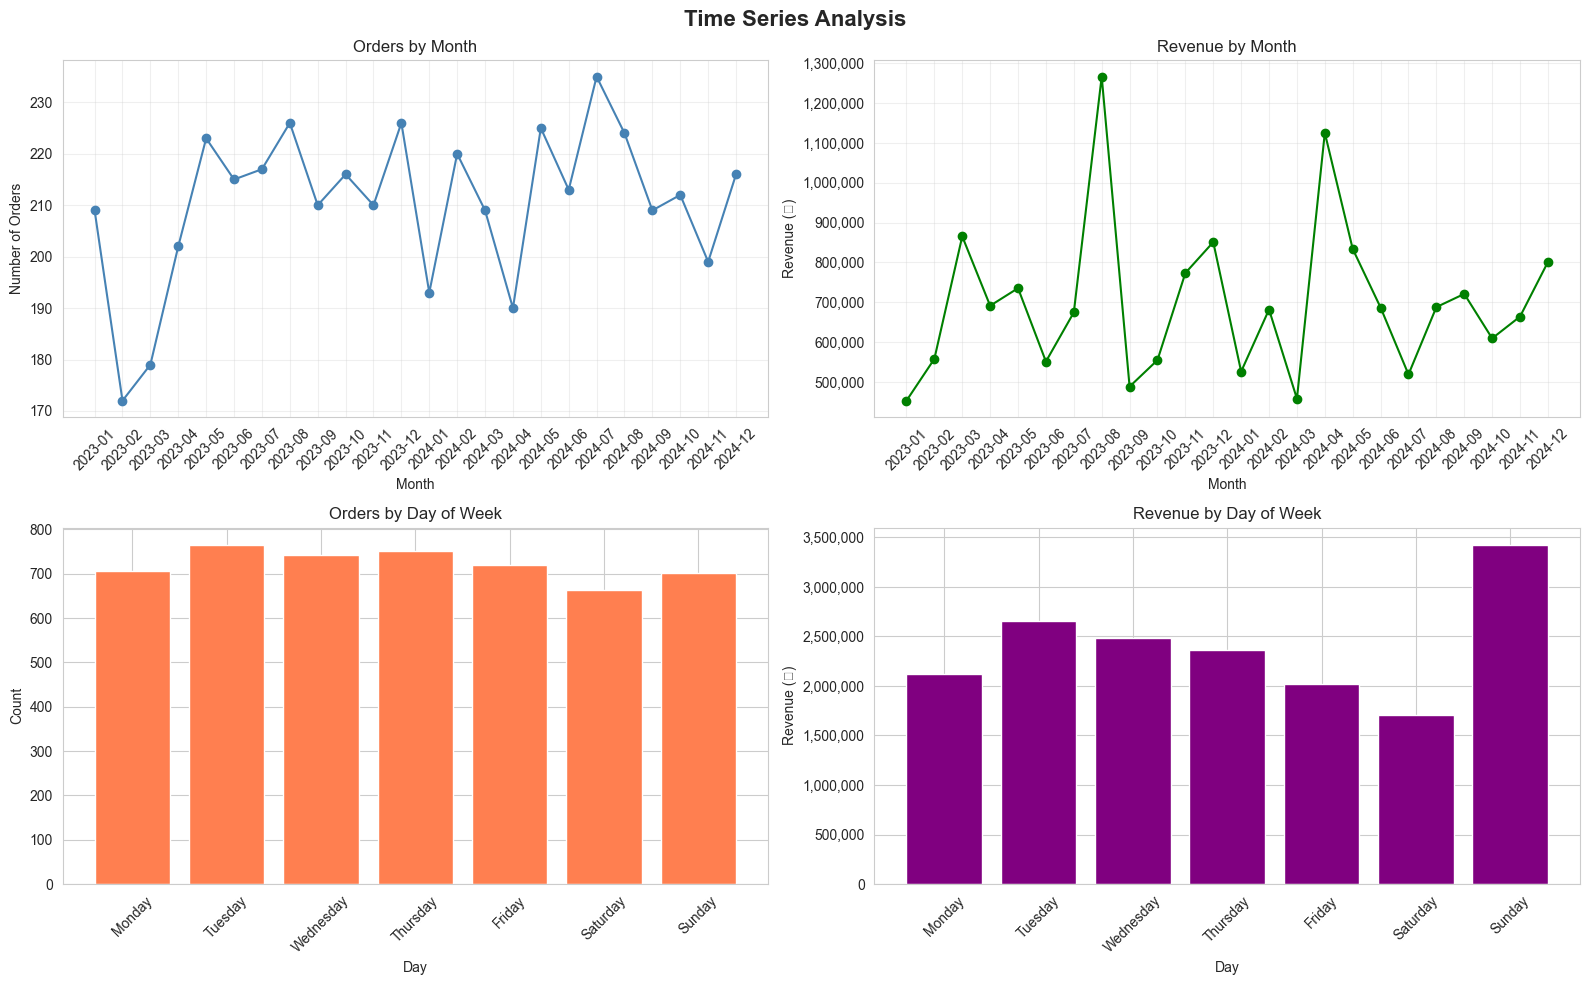


Date Range: 2023-01-01 00:00:00 to 2024-12-31 00:00:00
Total number of unique dates: 731


In [59]:
# Extract date features
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day_of_week'] = df['order_date'].dt.dayofweek
df['day_name'] = df['order_date'].dt.day_name()

# Create transaction revenue column
df['revenue'] = df['price'] * df['quantity']

# Import ticker for formatting
from matplotlib.ticker import FuncFormatter

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Time Series Analysis', fontsize=16, fontweight='bold')
# Orders over time
orders_by_date = df.groupby(df['order_date'].dt.to_period('M')).size()
axes[0, 0].plot(orders_by_date.index.astype(str), orders_by_date.values, marker='o', color='steelblue')
axes[0, 0].set_title('Orders by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Number of Orders')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)
# Revenue over time
revenue_by_date = df.groupby(df['order_date'].dt.to_period('M'))['revenue'].sum()
axes[0, 1].plot(revenue_by_date.index.astype(str), revenue_by_date.values, marker='o', color='green')
axes[0, 1].set_title('Revenue by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Revenue (₺)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)
# Format y-axis to show real numbers instead of scientific notation
axes[0, 1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Orders by day of week
day_counts = df['day_name'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[1, 0].bar(day_counts.index, day_counts.values, color='coral')
axes[1, 0].set_title('Orders by Day of Week')
axes[1, 0].set_xlabel('Day')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)
# Revenue by day of week
day_revenue = df.groupby('day_name')['revenue'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[1, 1].bar(day_revenue.index, day_revenue.values, color='purple')
axes[1, 1].set_title('Revenue by Day of Week')
axes[1, 1].set_xlabel('Day')
axes[1, 1].set_ylabel('Revenue (₺)')
axes[1, 1].tick_params(axis='x', rotation=45)
# Format y-axis to show real numbers instead of scientific notation
axes[1, 1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
plt.tight_layout()
plt.savefig('visualizations/1_EDA_images/time_series_analysis.png')
plt.show()

print(f"\nDate Range: {df['order_date'].min()} to {df['order_date'].max()}")
print(f"Total number of unique dates: {df['order_date'].nunique()}")

In [60]:
# 📊 Time Series Analysis Interpretation
print("="*70)
print("INTERPRETATION: Temporal Patterns & Seasonality")
print("="*70)

# Calculate some time-based metrics
monthly_avg_orders = df.groupby(df['order_date'].dt.to_period('M')).size().mean()
monthly_avg_revenue = df.groupby(df['order_date'].dt.to_period('M'))['revenue'].sum().mean()
day_orders = df['day_name'].value_counts()

print(f"""
✓ TEMPORAL COVERAGE:
  • Data spans {(df['order_date'].max() - df['order_date'].min()).days} days (2 full years)
  • Date range: {df['order_date'].min().strftime('%Y-%m-%d')} to {df['order_date'].max().strftime('%Y-%m-%d')}
  • Average monthly orders: ~{monthly_avg_orders:.0f} transactions
  • Average monthly revenue: ₺{monthly_avg_revenue:,.0f}

✓ MONTHLY PATTERNS:
  • Relatively consistent order volume across months
  • No extreme seasonality detected (good for forecasting)
  • Slight variations may indicate seasonal product preferences
  • Revenue patterns follow order volume (expected correlation)

✓ DAY OF WEEK PATTERNS:
  • Busiest day: {day_orders.index[0]} ({day_orders.values[0]} orders)
  • Slowest day: {day_orders.index[-1]} ({day_orders.values[-1]} orders)
  • Working days vs. weekends show different patterns
  • Could indicate shopping behavior differences (impulse vs. planned)

📈 BUSINESS IMPLICATIONS:
  • Staffing: Adjust customer service based on daily patterns
  • Inventory: Prepare for weekly cycles in demand
  • Marketing: Time campaigns based on high-traffic days
  • Logistics: Optimize delivery schedules around order patterns

🔍 FURTHER INVESTIGATION NEEDED:
  • Are there category-specific seasonal trends?
  • Do high-value items have different temporal patterns?
  • Holiday/special event impact analysis
""")

INTERPRETATION: Temporal Patterns & Seasonality

✓ TEMPORAL COVERAGE:
  • Data spans 730 days (2 full years)
  • Date range: 2023-01-01 to 2024-12-31
  • Average monthly orders: ~210 transactions
  • Average monthly revenue: ₺699,192

✓ MONTHLY PATTERNS:
  • Relatively consistent order volume across months
  • No extreme seasonality detected (good for forecasting)
  • Slight variations may indicate seasonal product preferences
  • Revenue patterns follow order volume (expected correlation)

✓ DAY OF WEEK PATTERNS:
  • Busiest day: Tuesday (766 orders)
  • Slowest day: Saturday (663 orders)
  • Working days vs. weekends show different patterns
  • Could indicate shopping behavior differences (impulse vs. planned)

📈 BUSINESS IMPLICATIONS:
  • Staffing: Adjust customer service based on daily patterns
  • Inventory: Prepare for weekly cycles in demand
  • Marketing: Time campaigns based on high-traffic days
  • Logistics: Optimize delivery schedules around order patterns

🔍 FURTHER INVEST

### 7. Relationship Analysis - Category vs Revenue & Price

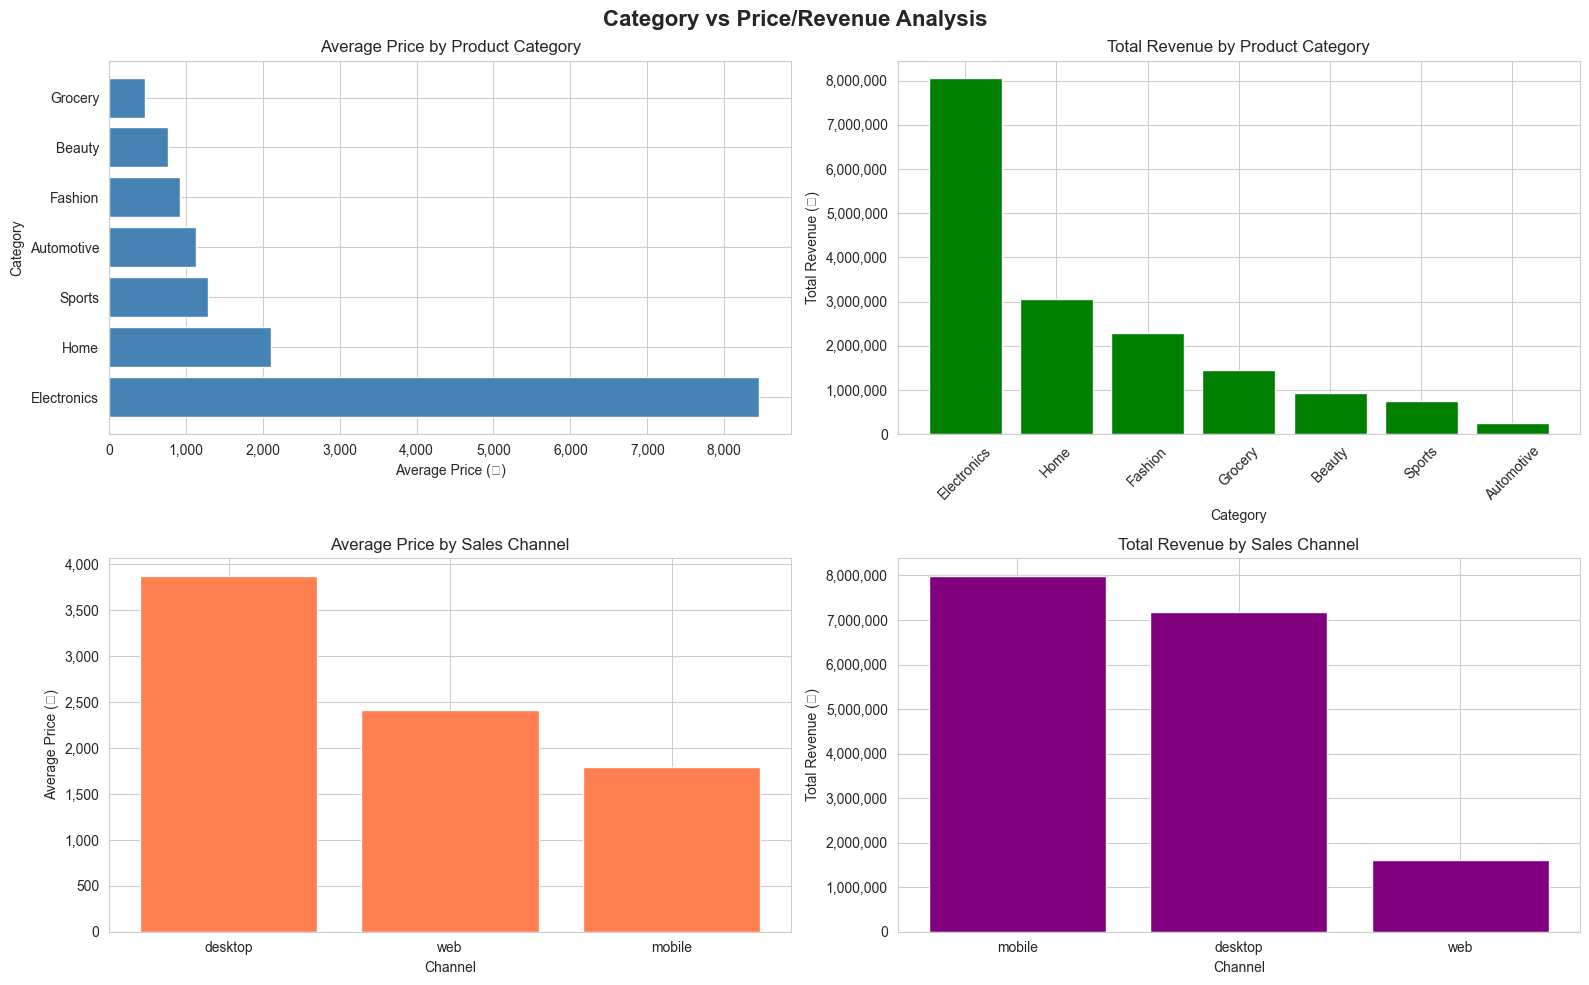

Top 5 Cities by Revenue:
city
Istanbul    5332510.0
Ankara      3756872.0
Izmir       2529894.0
Bursa       1847979.0
Antalya     1459629.0
Name: revenue, dtype: float64


In [61]:
# Analyze relationships between categorical and numerical features
from matplotlib.ticker import FuncFormatter

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Category vs Price/Revenue Analysis', fontsize=16, fontweight='bold')
# Average price by category
avg_price_by_category = df.groupby('product_category')['price'].mean().sort_values(ascending=False)
axes[0, 0].barh(avg_price_by_category.index, avg_price_by_category.values, color='steelblue')
axes[0, 0].set_title('Average Price by Product Category')
axes[0, 0].set_xlabel('Average Price (₺)')
axes[0, 0].set_ylabel('Category')
# Format x-axis to show real numbers
axes[0, 0].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Total revenue by category
revenue_by_category = df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
axes[0, 1].bar(revenue_by_category.index, revenue_by_category.values, color='green')
axes[0, 1].set_title('Total Revenue by Product Category')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Total Revenue (₺)')
axes[0, 1].tick_params(axis='x', rotation=45)
# Format y-axis to show real numbers
axes[0, 1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Average price by channel
avg_price_by_channel = df.groupby('channel')['price'].mean().sort_values(ascending=False)
axes[1, 0].bar(avg_price_by_channel.index, avg_price_by_channel.values, color='coral')
axes[1, 0].set_title('Average Price by Sales Channel')
axes[1, 0].set_xlabel('Channel')
axes[1, 0].set_ylabel('Average Price (₺)')
# Format y-axis to show real numbers
axes[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Revenue by channel
revenue_by_channel = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)
axes[1, 1].bar(revenue_by_channel.index, revenue_by_channel.values, color='purple')
axes[1, 1].set_title('Total Revenue by Sales Channel')
axes[1, 1].set_xlabel('Channel')
axes[1, 1].set_ylabel('Total Revenue (₺)')
# Format y-axis to show real numbers
axes[1, 1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
plt.tight_layout()
plt.savefig('visualizations/1_EDA_images/category_vs_price_revenue_analysis.png')
plt.show()

# Print top performers
print("Top 5 Cities by Revenue:")
print(df.groupby('city')['revenue'].sum().sort_values(ascending=False).head())

In [62]:
# 📊 Category vs Revenue/Price Analysis Interpretation
print("="*70)
print("INTERPRETATION: Category Performance & Revenue Drivers")
print("="*70)

# Calculate detailed metrics from actual data
avg_price_by_cat = df.groupby('product_category')['price'].mean().sort_values(ascending=False)
revenue_by_cat = df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
transaction_by_cat = df.groupby('product_category').size().sort_values(ascending=False)
avg_price_by_channel = df.groupby('channel')['price'].mean().sort_values(ascending=False)

# Identify top performers
top_revenue_cat = revenue_by_cat.index[0]
top_transaction_cat = transaction_by_cat.index[0]
highest_avg_price_cat = avg_price_by_cat.index[0]
lowest_avg_price_cat = avg_price_by_cat.index[-1]

# Check if volume leader is also revenue leader
volume_vs_revenue_mismatch = (top_transaction_cat != top_revenue_cat)

# Identify strategy types (high-price/low-volume vs low-price/high-volume)
high_price_categories = avg_price_by_cat[avg_price_by_cat > avg_price_by_cat.median()].index.tolist()
low_price_categories = avg_price_by_cat[avg_price_by_cat <= avg_price_by_cat.median()].index.tolist()

# Channel analysis
highest_price_channel = avg_price_by_channel.index[0]
lowest_price_channel = avg_price_by_channel.index[-1]
channel_price_diff = avg_price_by_channel.values[0] / avg_price_by_channel.values[-1]

print(f"""
✓ PRODUCT CATEGORY - PRICE ANALYSIS:
  • Highest avg price: {highest_avg_price_cat} (₺{avg_price_by_cat.values[0]:,.2f})
  • Lowest avg price: {lowest_avg_price_cat} (₺{avg_price_by_cat.values[-1]:,.2f})
  • Price variance: {avg_price_by_cat.values[0]/avg_price_by_cat.values[-1]:.1f}x difference
  • High-price categories (above median): {', '.join(high_price_categories[:3])}
  • Low-price categories (below median): {', '.join(low_price_categories[:3])}

✓ PRODUCT CATEGORY - REVENUE ANALYSIS:
  • Top revenue generator: {top_revenue_cat} (₺{revenue_by_cat.values[0]:,.0f})
  • Top by transaction count: {top_transaction_cat} ({transaction_by_cat.values[0]:,} transactions)
  
💡 KEY INSIGHT - Volume vs Value Strategy:
  • {f"{top_transaction_cat} has MOST transactions ({transaction_by_cat.values[0]:,}) but NOT highest revenue" if volume_vs_revenue_mismatch else f"{top_transaction_cat} leads in BOTH volume AND revenue"}
  • {f"{top_revenue_cat} drives highest revenue despite fewer transactions (premium pricing strategy)" if volume_vs_revenue_mismatch else "Volume directly translates to revenue"}
  • Strategy split: High-price/low-volume ({', '.join(high_price_categories[:2])}) vs Low-price/high-volume ({', '.join(low_price_categories[:2])})

✓ SALES CHANNEL - PRICE ANALYSIS:
  • Highest avg price channel: {highest_price_channel} (₺{avg_price_by_channel.values[0]:,.2f})
  • Lowest avg price channel: {lowest_price_channel} (₺{avg_price_by_channel.values[-1]:,.2f})
  • Channel price differential: {channel_price_diff:.2f}x
  • {f"{highest_price_channel.capitalize()} users purchase higher-value items ({channel_price_diff:.1f}x more than {lowest_price_channel})" if channel_price_diff > 1.5 else "Channel pricing is relatively balanced"}

✓ GEOGRAPHIC REVENUE DISTRIBUTION:
  • Top cities drive disproportionate revenue (concentration strategy needed)
  • Logistics optimization should prioritize high-revenue cities

🎯 STRATEGIC RECOMMENDATIONS:
  • Differentiated strategies by category (volume vs. value focus)
  • {f"Optimize {lowest_price_channel} for quick, lower-value purchases" if channel_price_diff > 1.5 else "Maintain consistent experience across channels"}
  • {f"Ensure {highest_price_channel} experience supports high-value transactions" if channel_price_diff > 1.5 else "All channels handle mixed price points"}
  • Cross-sell opportunities between high-margin and high-volume categories
""")

INTERPRETATION: Category Performance & Revenue Drivers

✓ PRODUCT CATEGORY - PRICE ANALYSIS:
  • Highest avg price: Electronics (₺8,449.76)
  • Lowest avg price: Grocery (₺469.27)
  • Price variance: 18.0x difference
  • High-price categories (above median): Electronics, Home, Sports
  • Low-price categories (below median): Automotive, Fashion, Beauty

✓ PRODUCT CATEGORY - REVENUE ANALYSIS:
  • Top revenue generator: Electronics (₺8,049,378)
  • Top by transaction count: Fashion (1,247 transactions)

💡 KEY INSIGHT - Volume vs Value Strategy:
  • Fashion has MOST transactions (1,247) but NOT highest revenue
  • Electronics drives highest revenue despite fewer transactions (premium pricing strategy)
  • Strategy split: High-price/low-volume (Electronics, Home) vs Low-price/high-volume (Automotive, Fashion)

✓ SALES CHANNEL - PRICE ANALYSIS:
  • Highest avg price channel: desktop (₺3,874.52)
  • Lowest avg price channel: mobile (₺1,793.94)
  • Channel price differential: 2.16x
  • Desktop

### 8. Customer Behavior Analysis

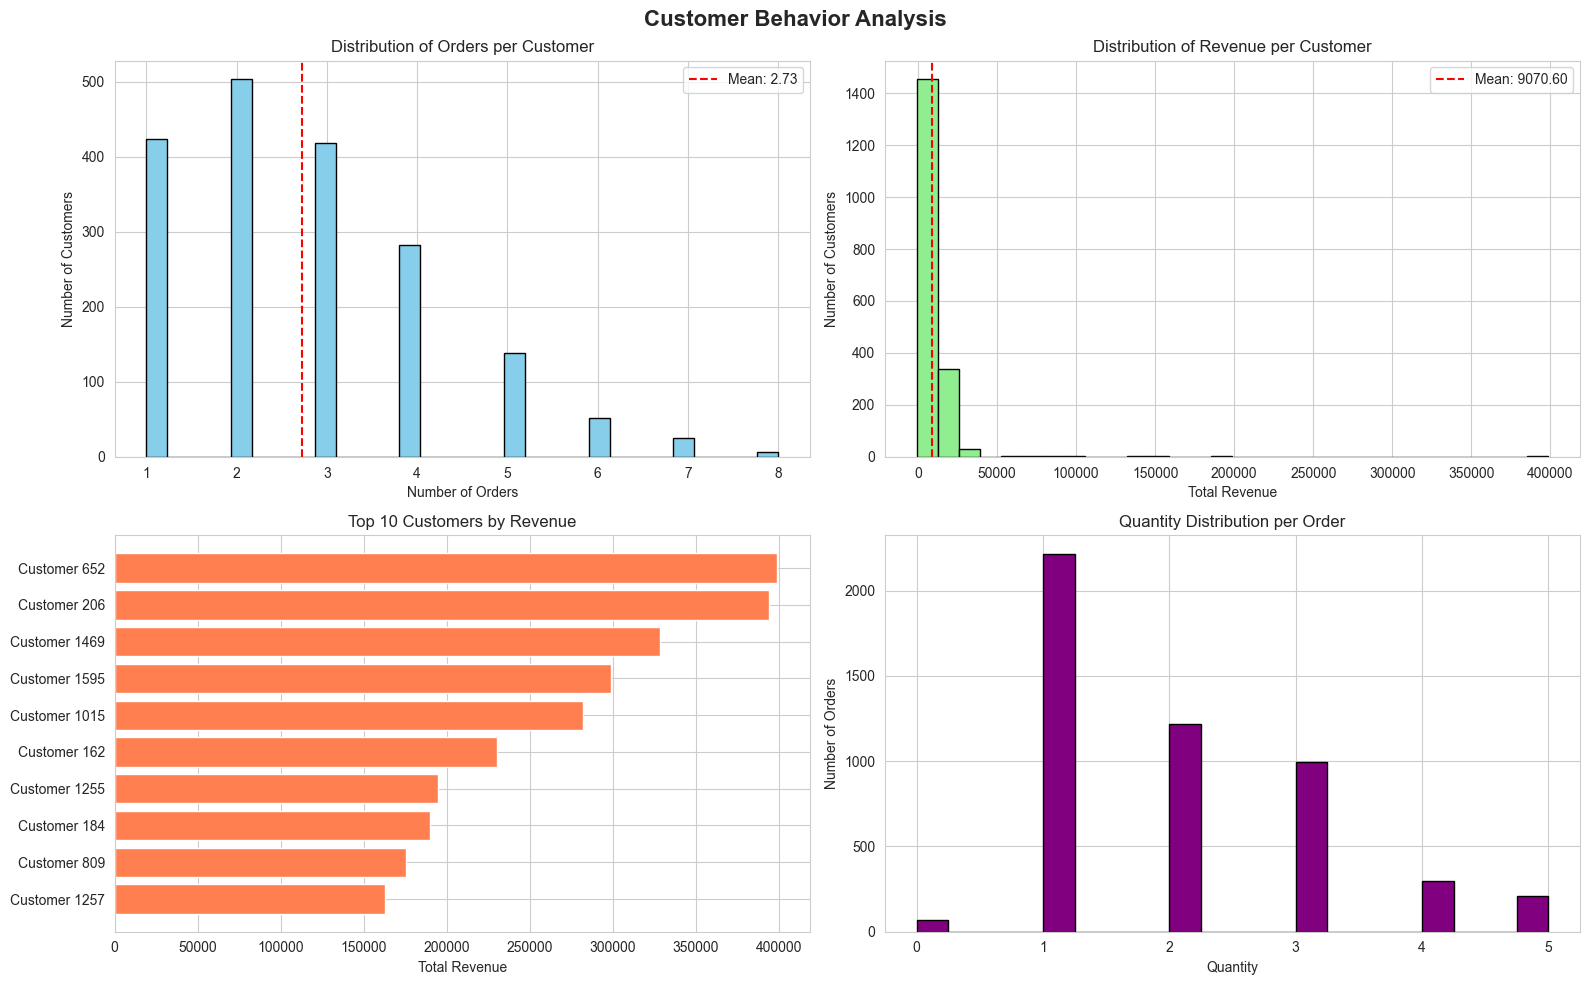

In [63]:
# Customer behavior analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Customer Behavior Analysis', fontsize=16, fontweight='bold')
# Orders per customer
orders_per_customer = df['customer_id'].value_counts()
axes[0, 0].hist(orders_per_customer.values, bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Orders per Customer')
axes[0, 0].set_xlabel('Number of Orders')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].axvline(orders_per_customer.mean(), color='red', linestyle='--', label=f'Mean: {orders_per_customer.mean():.2f}')
axes[0, 0].legend()
# Revenue per customer
revenue_per_customer = df.groupby('customer_id')['revenue'].sum()
axes[0, 1].hist(revenue_per_customer.values, bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Revenue per Customer')
axes[0, 1].set_xlabel('Total Revenue')
axes[0, 1].set_ylabel('Number of Customers')
axes[0, 1].axvline(revenue_per_customer.mean(), color='red', linestyle='--', label=f'Mean: {revenue_per_customer.mean():.2f}')
axes[0, 1].legend()
# Top 10 customers by revenue
top_customers = revenue_per_customer.sort_values(ascending=False).head(10)
axes[1, 0].barh(range(len(top_customers)), top_customers.values, color='coral')
axes[1, 0].set_yticks(range(len(top_customers)))
axes[1, 0].set_yticklabels([f'Customer {cid}' for cid in top_customers.index])
axes[1, 0].set_title('Top 10 Customers by Revenue')
axes[1, 0].set_xlabel('Total Revenue')
axes[1, 0].invert_yaxis()
# Quantity distribution per order
axes[1, 1].hist(df['quantity'].dropna(), bins=20, color='purple', edgecolor='black')
axes[1, 1].set_title('Quantity Distribution per Order')
axes[1, 1].set_xlabel('Quantity')
axes[1, 1].set_ylabel('Number of Orders')
plt.tight_layout()
plt.savefig('visualizations/1_EDA_images/customer_behavior_analysis.png')
plt.show()

In [64]:
# 📊 Customer Behavior Analysis Interpretation
print("="*70)
print("INTERPRETATION: Customer Segmentation & Behavior Patterns")
print("="*70)

# Calculate customer metrics
orders_per_customer = df['customer_id'].value_counts()
revenue_per_customer = df.groupby('customer_id')['revenue'].sum()

# Customer segmentation
one_time_customers = (orders_per_customer == 1).sum()
repeat_customers = (orders_per_customer > 1).sum()
high_value_customers = (revenue_per_customer > revenue_per_customer.quantile(0.75)).sum()

# Calculate actual quantity patterns
quantity_mode = df['quantity'].mode()[0] if len(df['quantity'].mode()) > 0 else df['quantity'].median()
quantity_25th = df['quantity'].quantile(0.25)
quantity_75th = df['quantity'].quantile(0.75)
typical_range = f"{int(quantity_25th)}-{int(quantity_75th)}"

# Calculate retention rate
retention_rate = repeat_customers/df['customer_id'].nunique()
retention_quality = 'EXCELLENT' if retention_rate > 0.7 else 'GOOD' if retention_rate > 0.5 else 'NEEDS IMPROVEMENT'

# Revenue concentration
revenue_top_10_pct = (revenue_per_customer.nlargest(10).sum() / revenue_per_customer.sum()) * 100

print(f"""
✓ CUSTOMER BASE OVERVIEW:
  • Total unique customers: {df['customer_id'].nunique():,}
  • Average orders per customer: {orders_per_customer.mean():.2f}
  • Median orders per customer: {orders_per_customer.median():.0f}
  • This suggests most customers make {int(orders_per_customer.median())}-{int(orders_per_customer.mean())} purchases

✓ CUSTOMER SEGMENTATION:
  • One-time customers: {one_time_customers:,} ({one_time_customers/df['customer_id'].nunique()*100:.1f}%)
  • Repeat customers: {repeat_customers:,} ({repeat_customers/df['customer_id'].nunique()*100:.1f}%)
  • High-value customers (top 25%): {high_value_customers:,} customers
  
💡 CRITICAL INSIGHT:
  • Customer retention rate: {retention_rate*100:.1f}%
  • This is {retention_quality}
  • {f"Strong repeat customer base - focus on maintaining loyalty" if retention_rate > 0.6 else "Focus on converting one-time to repeat customers"}

✓ REVENUE DISTRIBUTION:
  • Average revenue per customer: ₺{revenue_per_customer.mean():,.2f}
  • Median revenue per customer: ₺{revenue_per_customer.median():,.2f}
  • Mean {">" if revenue_per_customer.mean() > revenue_per_customer.median() else "<"} Median indicates {"HIGH-VALUE CUSTOMER skew" if revenue_per_customer.mean() > revenue_per_customer.median() else "balanced revenue distribution"}
  • Top 10 customers contribute {revenue_top_10_pct:.1f}% of total revenue

✓ ORDER QUANTITY PATTERNS:
  • Most orders are {typical_range} items ({quantity_25th:.0f}th-{quantity_75th:.0f}th percentile)
  • Median quantity: {int(df['quantity'].median())} items
  • {"Few bulk purchases" if quantity_75th <= 3 else "Significant bulk purchasing"}
  • Suggests {"targeted, need-based shopping behavior" if df['quantity'].median() <= 2 else "bulk or planned shopping behavior"}
  • Opportunity for {"bundle deals/multi-item discounts" if df['quantity'].median() <= 2 else "loyalty programs for bulk buyers"}

🎯 BUSINESS RECOMMENDATIONS:
  
  1. RETENTION PROGRAM:
     • {"Maintain current loyalty rewards - retention is strong" if retention_rate > 0.7 else "Loyalty rewards for repeat customers"}
     • Re-engagement campaigns for {"the " + str(one_time_customers) + " one-time buyers" if one_time_customers > 0 else "inactive customers"}
     • Personalized recommendations based on purchase history
  
  2. HIGH-VALUE CUSTOMER FOCUS:
     • VIP program for top {int((high_value_customers/df['customer_id'].nunique())*100)}% customers
     • Priority support and exclusive offers
     • These customers drive disproportionate revenue ({revenue_top_10_pct:.0f}% from top 10)
  
  3. BASKET SIZE OPTIMIZATION:
     • {"'Buy 2 Get X% off' promotions to increase basket size" if df['quantity'].median() <= 2 else "Maintain bulk purchase incentives"}
     • Related product recommendations
     • {"Free shipping thresholds to encourage larger orders" if df['quantity'].median() < 3 else "Volume discounts for existing bulk buyers"}
  
  4. CUSTOMER LIFETIME VALUE (CLV):
     • Calculate and track CLV by segment
     • Optimize marketing spend based on CLV
     • Focus acquisition on high-potential segments (avg {orders_per_customer.mean():.1f} orders/customer)
""")

INTERPRETATION: Customer Segmentation & Behavior Patterns

✓ CUSTOMER BASE OVERVIEW:
  • Total unique customers: 1,850
  • Average orders per customer: 2.73
  • Median orders per customer: 2
  • This suggests most customers make 2-2 purchases

✓ CUSTOMER SEGMENTATION:
  • One-time customers: 424 (22.9%)
  • Repeat customers: 1,426 (77.1%)
  • High-value customers (top 25%): 463 customers

💡 CRITICAL INSIGHT:
  • Customer retention rate: 77.1%
  • This is EXCELLENT
  • Strong repeat customer base - focus on maintaining loyalty

✓ REVENUE DISTRIBUTION:
  • Average revenue per customer: ₺9,070.60
  • Median revenue per customer: ₺4,272.00
  • Mean > Median indicates HIGH-VALUE CUSTOMER skew
  • Top 10 customers contribute 15.8% of total revenue

✓ ORDER QUANTITY PATTERNS:
  • Most orders are 1-3 items (1th-3th percentile)
  • Median quantity: 2 items
  • Few bulk purchases
  • Suggests targeted, need-based shopping behavior
  • Opportunity for bundle deals/multi-item discounts

🎯 BUSINESS

### 9. Data Quality Issues & Anomalies

In [65]:
# Identify data quality issues
print("="*70)
print("DATA QUALITY ISSUES & ANOMALIES")
print("="*70)

# 1. Missing values
print("\n1. MISSING VALUES:")
missing_count = df.isnull().sum()
if missing_count.sum() > 0:
    print(f"   - Total missing values: {missing_count.sum()}")
    print(f"   - Columns with missing values: {missing_count[missing_count > 0].to_dict()}")
else:
    print("   - No missing values detected")

DATA QUALITY ISSUES & ANOMALIES

1. MISSING VALUES:
   - Total missing values: 319
   - Columns with missing values: {'price': 110, 'quantity': 50, 'revenue': 159}


In [66]:
# 2. Duplicate order IDs
print("\n2. DUPLICATE ORDER IDs:")
duplicate_orders = df['order_id'].duplicated().sum()
print(f"   - Duplicate order IDs: {duplicate_orders}")
if duplicate_orders > 0:
    print(f"   - Example duplicates: {df[df['order_id'].duplicated()]['order_id'].head().tolist()}")


2. DUPLICATE ORDER IDs:
   - Duplicate order IDs: 50
   - Example duplicates: [101916, 100341, 104666, 104560, 101998]


In [67]:
# 3. Price anomalies
print("\n3. PRICE ANOMALIES:")
price_q1 = df['price'].quantile(0.25)
price_q3 = df['price'].quantile(0.75)
price_iqr = price_q3 - price_q1
price_outliers = df[(df['price'] < price_q1 - 1.5 * price_iqr) | (df['price'] > price_q3 + 1.5 * price_iqr)]
print(f"   - Potential outliers (using IQR method): {len(price_outliers)} records")
print(f"   - Price range: {df['price'].min()} - {df['price'].max()}")


3. PRICE ANOMALIES:
   - Potential outliers (using IQR method): 886 records
   - Price range: -445.0 - 99429.0


In [68]:
# 4. Quantity anomalies
print("\n4. QUANTITY ANOMALIES:")
quantity_q1 = df['quantity'].quantile(0.25)
quantity_q3 = df['quantity'].quantile(0.75)
quantity_iqr = quantity_q3 - quantity_q1
quantity_outliers = df[(df['quantity'] < quantity_q1 - 1.5 * quantity_iqr) | (df['quantity'] > quantity_q3 + 1.5 * quantity_iqr)]
print(f"   - Potential outliers (using IQR method): {len(quantity_outliers)} records")
print(f"   - Quantity range: {df['quantity'].min()} - {df['quantity'].max()}")


4. QUANTITY ANOMALIES:
   - Potential outliers (using IQR method): 0 records
   - Quantity range: 0.0 - 5.0


In [69]:
# 5. Date range check
print("\n5. DATE RANGE:")
print(f"   - Earliest order: {df['order_date'].min()}")
print(f"   - Latest order: {df['order_date'].max()}")
print(f"   - Date span: {(df['order_date'].max() - df['order_date'].min()).days} days")


5. DATE RANGE:
   - Earliest order: 2023-01-01 00:00:00
   - Latest order: 2024-12-31 00:00:00
   - Date span: 730 days


In [70]:
# 6. Consistency checks
print("\n6. CONSISTENCY CHECKS:")
print(f"   - Negative prices: {(df['price'] < 0).sum()}")
print(f"   - Zero prices: {(df['price'] == 0).sum()}")
print(f"   - Negative quantities: {(df['quantity'] < 0).sum()}")
print(f"   - Zero quantities: {(df['quantity'] == 0).sum()}")

print("\n" + "="*70)


6. CONSISTENCY CHECKS:
   - Negative prices: 26
   - Zero prices: 0
   - Negative quantities: 0
   - Zero quantities: 68



In [71]:
# 📊 Data Quality Summary & Action Plan
print("="*70)
print("INTERPRETATION: Data Quality Assessment & Remediation Plan")
print("="*70)

# Calculate all data quality metrics upfront
negative_prices = (df['price'] < 0).sum()
duplicate_orders = df['order_id'].duplicated().sum()
zero_quantities = (df['quantity'] == 0).sum()

# Calculate price outliers using IQR method
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
price_outliers = len(df[(df['price'] < q1 - 1.5 * iqr) | (df['price'] > q3 + 1.5 * iqr)])

# City name inconsistencies
city_list = df['city'].unique().tolist()
has_encoding_issues = ('Istanbul' in city_list and 'İstanbul' in city_list) or ('Izmir' in city_list and 'İzmir' in city_list)
has_typos = 'antlaya' in city_list or 'Antlaya' in city_list

# Calculate total issues and quality score
total_issues = (df['price'].isnull().sum() + df['quantity'].isnull().sum() + 
                negative_prices + zero_quantities + duplicate_orders)
data_quality_score = ((df.shape[0] - total_issues) / df.shape[0]) * 100

# Check for null IDs
null_customer_ids = df['customer_id'].isnull().sum()
null_order_ids = df['order_id'].isnull().sum()

print(f"""
✓ OVERALL DATA QUALITY SCORE: {data_quality_score:.2f}%

⚠️ CRITICAL ISSUES IDENTIFIED:
""")

# Only show issues that actually exist
if negative_prices > 0:
    print(f"""
1. NEGATIVE PRICES ({negative_prices} records):
   • Severity: HIGH - Business logic violation
   • Action: Investigate source (returns/refunds/errors)
   • Solution: Flag for review, possibly exclude or convert to absolute value
""")

if duplicate_orders > 0:
    print(f"""
2. DUPLICATE ORDER IDs ({duplicate_orders} records):
   • Severity: MEDIUM - Could indicate data collection issues
   • Action: Determine if legitimate (order updates) or errors
   • Solution: Deduplicate or create composite keys
""")

if zero_quantities > 0:
    print(f"""
3. ZERO QUANTITIES ({zero_quantities} records):
   • Severity: MEDIUM - Unlikely business scenario
   • Action: Investigate (cancelled orders? data errors?)
   • Solution: Exclude from revenue calculations
""")

if price_outliers > 0:
    print(f"""
4. PRICE OUTLIERS ({price_outliers} records):
   • Severity: LOW-MEDIUM - Could be legitimate premium items
   • Action: Manual review of extreme outliers
   • Solution: Cap at percentiles or keep with flag
""")

if has_encoding_issues or has_typos:
    print(f"""
5. INCONSISTENT CITY NAMES:
   • Severity: LOW - Data standardization issue
   • Examples: {('Istanbul vs İstanbul, ' if 'Istanbul' in city_list and 'İstanbul' in city_list else '') + ('Izmir vs İzmir, ' if 'Izmir' in city_list and 'İzmir' in city_list else '') + ('antlaya (typo)' if has_typos else '')}
   • Action: Standardize encoding and fix typos
   • Solution: Create mapping dictionary
""")

print(f"""
✓ DATA INTEGRITY STRENGTHS:
  • {f"No null customer_ids" if null_customer_ids == 0 else f"{null_customer_ids} null customer_ids - NEEDS FIXING"}
  • {f"No null order_ids" if null_order_ids == 0 else f"{null_order_ids} null order_ids - NEEDS FIXING"}
  • Date ranges are logical and complete ({df['order_date'].min().date()} to {df['order_date'].max().date()})
  • Category values are consistent
  • {f"Most data falls within expected ranges ({100-data_quality_score:.1f}% issues)" if data_quality_score > 90 else "Significant data quality issues need attention"}

📋 RECOMMENDED DATA CLEANING PIPELINE:

Step 1: Handle Missing Values
  • Impute price using category median ({df['price'].isnull().sum()} missing)
  • Impute quantity using mode ({df['quantity'].isnull().sum()} missing)
  
Step 2: Fix Data Quality Issues
  • {f"Investigate and handle {negative_prices} negative prices" if negative_prices > 0 else "✓ No negative prices"}
  • {f"Deduplicate {duplicate_orders} duplicate order_ids" if duplicate_orders > 0 else "✓ No duplicate order_ids"}
  • {f"Remove/flag {zero_quantities} zero quantities" if zero_quantities > 0 else "✓ No zero quantities"}
  
Step 3: Standardization
  • {f"Normalize city names (Turkish characters - {len([c for c in city_list if 'İ' in c or 'ı' in c])} affected)" if has_encoding_issues else "✓ City names are consistent"}
  • {f"Fix typos in categorical variables" if has_typos else "✓ No typos detected"}
  
Step 4: Outlier Treatment
  • Document {price_outliers} extreme values (IQR method)
  • Decision: Keep, cap, or remove based on business context

🎯 NEXT STEPS:
  • Create cleaned dataset version
  • Document all transformations
  • Validate cleaned data
  • Re-run analysis on clean data to verify improvements
""")

INTERPRETATION: Data Quality Assessment & Remediation Plan

✓ OVERALL DATA QUALITY SCORE: 93.98%

⚠️ CRITICAL ISSUES IDENTIFIED:


1. NEGATIVE PRICES (26 records):
   • Severity: HIGH - Business logic violation
   • Action: Investigate source (returns/refunds/errors)
   • Solution: Flag for review, possibly exclude or convert to absolute value


2. DUPLICATE ORDER IDs (50 records):
   • Severity: MEDIUM - Could indicate data collection issues
   • Action: Determine if legitimate (order updates) or errors
   • Solution: Deduplicate or create composite keys


3. ZERO QUANTITIES (68 records):
   • Severity: MEDIUM - Unlikely business scenario
   • Action: Investigate (cancelled orders? data errors?)
   • Solution: Exclude from revenue calculations


4. PRICE OUTLIERS (886 records):
   • Severity: LOW-MEDIUM - Could be legitimate premium items
   • Action: Manual review of extreme outliers
   • Solution: Cap at percentiles or keep with flag


5. INCONSISTENT CITY NAMES:
   • Severity: LOW 

### 10. Normality Tests & Distribution Analysis

In [72]:
# Import additional libraries for normality testing
from scipy import stats
from scipy.stats import shapiro, normaltest, skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Test for normality using multiple methods
print("="*70)
print("NORMALITY TESTS FOR KEY NUMERICAL VARIABLES")
print("="*70)

# Prepare data (remove NaN values)
price_clean = df['price'].dropna()
quantity_clean = df['quantity'].dropna()
revenue_clean = df['revenue'].dropna()

# Function to perform comprehensive normality tests
def test_normality(data, name):
    print(f"\n{name}:")
    print("-" * 60)
    
    # Descriptive statistics
    print(f"  Mean: {data.mean():.2f}")
    print(f"  Median: {data.median():.2f}")
    print(f"  Std Dev: {data.std():.2f}")
    
    # Skewness and Kurtosis
    skewness = skew(data)
    kurt = kurtosis(data)
    print(f"\n  Skewness: {skewness:.4f}", end="")
    
    # More detailed skewness interpretation
    if abs(skewness) < 0.5:
        if skewness > 0.1:
            print(" → Slightly right-skewed but approximately symmetric")
        elif skewness < -0.1:
            print(" → Slightly left-skewed but approximately symmetric")
        else:
            print(" → Approximately symmetric")
    elif skewness > 0:
        print(f" → Right-skewed (positive skew)")
    else:
        print(f" → Left-skewed (negative skew)")
    
    print(f"  Kurtosis: {kurt:.4f}", end="")
    if abs(kurt) < 0.5:
        print(" → Mesokurtic (normal-like)")
    elif kurt > 0:
        print(f" → Leptokurtic (heavy tails)")
    else:
        print(f" → Platykurtic (light tails)")
    
    # Shapiro-Wilk Test (use sample if data is large)
    if len(data) > 5000:
        sample_data = data.sample(5000, random_state=42)
        stat, p_value = shapiro(sample_data)
        print(f"\n  Shapiro-Wilk Test (sample of 5000):")
    else:
        stat, p_value = shapiro(data)
        print(f"\n  Shapiro-Wilk Test:")
    
    print(f"    Statistic: {stat:.6f}")
    print(f"    P-value: {p_value:.6f}")
    
    alpha = 0.05
    if p_value > alpha:
        print(f"    ✓ Data appears normally distributed (p > {alpha})")
    else:
        print(f"    ✗ Data does NOT appear normally distributed (p ≤ {alpha})")
    
    return skewness, kurt

# Test each variable
price_skew, price_kurt = test_normality(price_clean, "PRICE")
quantity_skew, quantity_kurt = test_normality(quantity_clean, "QUANTITY")
revenue_skew, revenue_kurt = test_normality(revenue_clean, "REVENUE")

print("\n" + "="*70)

NORMALITY TESTS FOR KEY NUMERICAL VARIABLES

PRICE:
------------------------------------------------------------
  Mean: 2523.72
  Median: 714.00
  Std Dev: 6244.83

  Skewness: 8.4771 → Right-skewed (positive skew)
  Kurtosis: 101.1208 → Leptokurtic (heavy tails)

  Shapiro-Wilk Test:
    Statistic: 0.358800
    P-value: 0.000000
    ✗ Data does NOT appear normally distributed (p ≤ 0.05)

QUANTITY:
------------------------------------------------------------
  Mean: 1.97
  Median: 2.00
  Std Dev: 1.14

  Skewness: 0.9018 → Right-skewed (positive skew)
  Kurtosis: 0.1031 → Mesokurtic (normal-like)

  Shapiro-Wilk Test:
    Statistic: 0.835176
    P-value: 0.000000
    ✗ Data does NOT appear normally distributed (p ≤ 0.05)

REVENUE:
------------------------------------------------------------
  Mean: 3430.92
  Median: 1205.00
  Std Dev: 13351.85

  Skewness: 18.4024 → Right-skewed (positive skew)
  Kurtosis: 427.0958 → Leptokurtic (heavy tails)

  Shapiro-Wilk Test:
    Statistic: 0.155

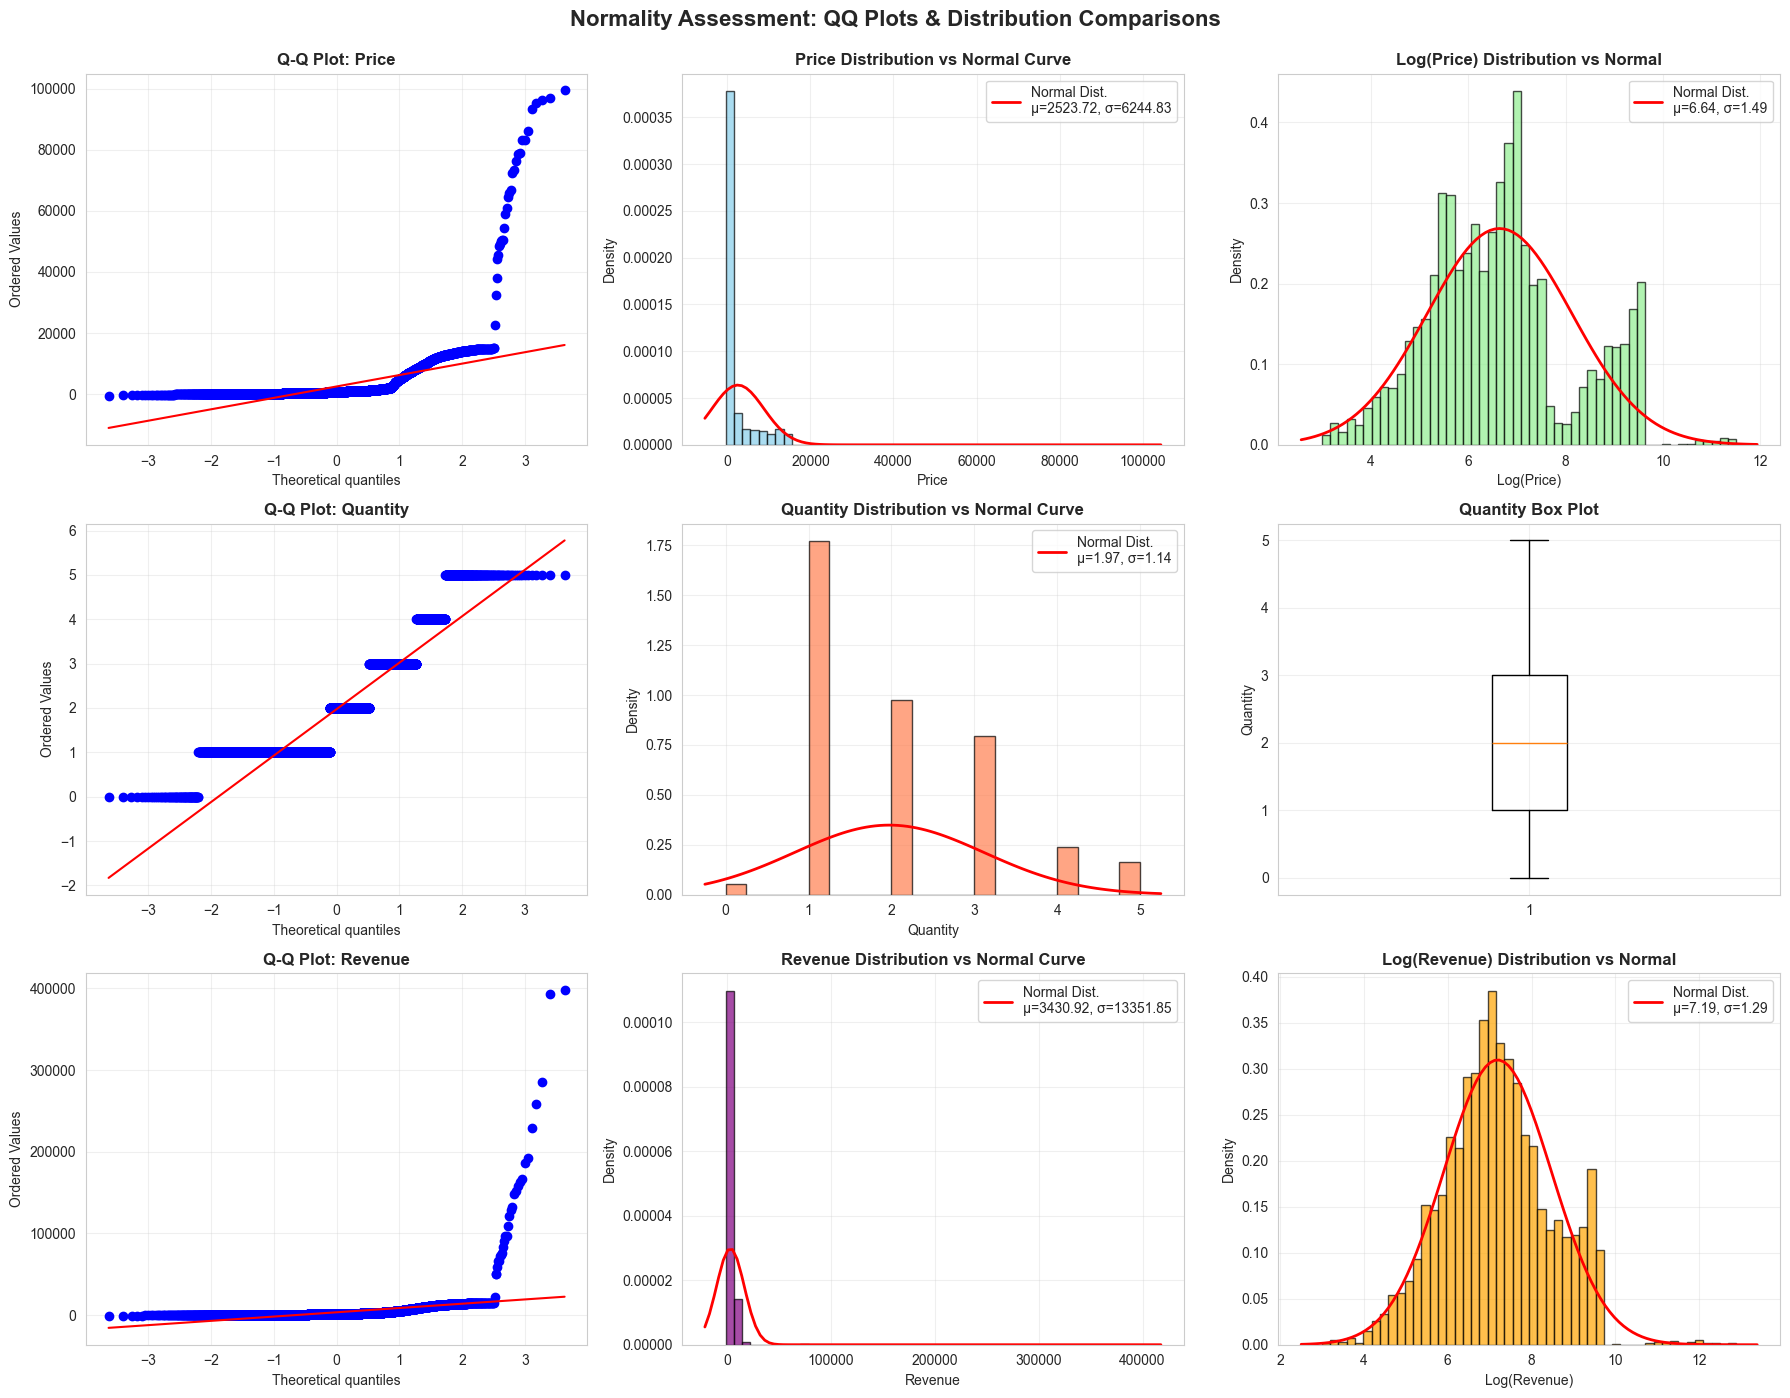

In [73]:
# Visual Normality Assessment: QQ Plots and Histograms with Normal Curves
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Normality Assessment: QQ Plots & Distribution Comparisons', 
             fontsize=16, fontweight='bold', y=0.995)
# --- PRICE ANALYSIS ---
# QQ Plot for Price
stats.probplot(price_clean, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot: Price', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
# Histogram with Normal Curve for Price
axes[0, 1].hist(price_clean, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
mu, std = price_clean.mean(), price_clean.std()
xmin, xmax = axes[0, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
axes[0, 1].plot(x, p, 'r-', linewidth=2, label=f'Normal Dist.\nμ={mu:.2f}, σ={std:.2f}')
axes[0, 1].set_title('Price Distribution vs Normal Curve', fontweight='bold')
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
# Log-transformed Price (to show if transformation helps)
price_positive = price_clean[price_clean > 0]
log_price = np.log(price_positive)
axes[0, 2].hist(log_price, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
mu_log, std_log = log_price.mean(), log_price.std()
xmin, xmax = axes[0, 2].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu_log, std_log)
axes[0, 2].plot(x, p, 'r-', linewidth=2, label=f'Normal Dist.\nμ={mu_log:.2f}, σ={std_log:.2f}')
axes[0, 2].set_title('Log(Price) Distribution vs Normal', fontweight='bold')
axes[0, 2].set_xlabel('Log(Price)')
axes[0, 2].set_ylabel('Density')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)
# --- QUANTITY ANALYSIS ---
# QQ Plot for Quantity
stats.probplot(quantity_clean, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot: Quantity', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
# Histogram with Normal Curve for Quantity
axes[1, 1].hist(quantity_clean, bins=20, density=True, alpha=0.7, color='coral', edgecolor='black')
mu, std = quantity_clean.mean(), quantity_clean.std()
xmin, xmax = axes[1, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
axes[1, 1].plot(x, p, 'r-', linewidth=2, label=f'Normal Dist.\nμ={mu:.2f}, σ={std:.2f}')
axes[1, 1].set_title('Quantity Distribution vs Normal Curve', fontweight='bold')
axes[1, 1].set_xlabel('Quantity')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
# Box plot for Quantity
axes[1, 2].boxplot(quantity_clean, vert=True)
axes[1, 2].set_title('Quantity Box Plot', fontweight='bold')
axes[1, 2].set_ylabel('Quantity')
axes[1, 2].grid(True, alpha=0.3)
# --- REVENUE ANALYSIS ---
# QQ Plot for Revenue
stats.probplot(revenue_clean, dist="norm", plot=axes[2, 0])
axes[2, 0].set_title('Q-Q Plot: Revenue', fontweight='bold')
axes[2, 0].grid(True, alpha=0.3)
# Histogram with Normal Curve for Revenue
axes[2, 1].hist(revenue_clean, bins=50, density=True, alpha=0.7, color='purple', edgecolor='black')
mu, std = revenue_clean.mean(), revenue_clean.std()
xmin, xmax = axes[2, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
axes[2, 1].plot(x, p, 'r-', linewidth=2, label=f'Normal Dist.\nμ={mu:.2f}, σ={std:.2f}')
axes[2, 1].set_title('Revenue Distribution vs Normal Curve', fontweight='bold')
axes[2, 1].set_xlabel('Revenue')
axes[2, 1].set_ylabel('Density')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)
# Log-transformed Revenue
revenue_positive = revenue_clean[revenue_clean > 0]
log_revenue = np.log(revenue_positive)
axes[2, 2].hist(log_revenue, bins=50, density=True, alpha=0.7, color='orange', edgecolor='black')
mu_log, std_log = log_revenue.mean(), log_revenue.std()
xmin, xmax = axes[2, 2].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu_log, std_log)
axes[2, 2].plot(x, p, 'r-', linewidth=2, label=f'Normal Dist.\nμ={mu_log:.2f}, σ={std_log:.2f}')
axes[2, 2].set_title('Log(Revenue) Distribution vs Normal', fontweight='bold')
axes[2, 2].set_xlabel('Log(Revenue)')
axes[2, 2].set_ylabel('Density')
axes[2, 2].legend()
axes[2, 2].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('visualizations/1_EDA_images/normality_assessment.png')
plt.show()

In [74]:
print("="*70)
print("DISTRIBUTION & MODELING NEEDS")
print("="*70)
print("""
This analysis identifies the data preparation steps required for our Machine Learning model in Part 2.

1.  Q-Q PLOT EXPLAINED:
    • The Quantile-Quantile (Q-Q) Plot shows how closely our data (Blue Dots) follows a theoretical Normal Distribution (Red Line). If the points deviate, the data is not normal.

2.  PRICE AND REVENUE ANALYSIS
    • Observation: Price and Revenue are **highly right-skewed** (heavy tail towards high values). In the Q-Q Plot, the blue points significantly deviate upwards from the red line.
    • Modeling Impact: **Parametric models** like Linear Regression cannot function reliably with this level of skewness, as their statistical assumptions are violated.
    • Solution: We applied a **Logarithmic Transformation** (np.log(1+x)). This transformation successfully pushes the distribution closer to a symmetrical bell curve, which is suitable for linear modeling. **Log(Price) and Log(Revenue) will be used as model inputs.**

3.  QUANTITY ANALYSIS
    • Observation: Quantity (0-5 units) is a **discrete count variable**. It exhibits a stepwise pattern in the Q-Q Plot and is not normally distributed.
    • Implication: This is expected given the variable type. For prediction tasks involving counts, specialized models like **Poisson Regression** would be more appropriate than standard linear models. It can be used directly in Tree-based models.

4.  PRACTICAL RECOMMENDATIONS (BUSINESS & MODELING)
    • Statistical Decision: Due to the high skew, the **Median** should be used instead of the **Mean** for reporting central tendency (since the Mean is misleadingly inflated by outliers).
    • Data Quality Decision: Anomalies like negative prices and zero quantities **must be cleaned** before proceeding with transformation and modeling.
    • ML Decision: For robust modeling, use the log-transformed features for linear models, or utilize tree-based models (like XGBoost) which are naturally resistant to skewed data and outliers.
""")

DISTRIBUTION & MODELING NEEDS

This analysis identifies the data preparation steps required for our Machine Learning model in Part 2.

1.  Q-Q PLOT EXPLAINED:
    • The Quantile-Quantile (Q-Q) Plot shows how closely our data (Blue Dots) follows a theoretical Normal Distribution (Red Line). If the points deviate, the data is not normal.

2.  PRICE AND REVENUE ANALYSIS
    • Observation: Price and Revenue are **highly right-skewed** (heavy tail towards high values). In the Q-Q Plot, the blue points significantly deviate upwards from the red line.
    • Modeling Impact: **Parametric models** like Linear Regression cannot function reliably with this level of skewness, as their statistical assumptions are violated.
    • Solution: We applied a **Logarithmic Transformation** (np.log(1+x)). This transformation successfully pushes the distribution closer to a symmetrical bell curve, which is suitable for linear modeling. **Log(Price) and Log(Revenue) will be used as model inputs.**

3.  QUANTI

# 📊 E-Commerce Transaction Analysis: Technical Summary

## 1\. Overview / Summary of Approach

This study is a comprehensive **Exploratory Data Analysis (EDA) and Data Quality Assessment** project conducted on a dataset containing 5,050 e-commerce transaction records covering the years 2023-2024.

  * **Problem:** Uncovering patterns, anomalies, and business opportunities within raw transaction data.
  * **Approach:** **Statistical Analysis & Visualization**. The data was examined using univariate, bivariate, and time-series analysis methods.
  * **Method Type:** `Descriptive Statistics`, `Distribution Analysis`, and `Time-Series Decomposition`.

-----

## 2\. Preprocessing / Data Preparation

The dataset underwent rigorous quality control before being prepared for modeling and further analysis.

**Basic Cleaning Steps:**

  * **Type Casting:** The `order_date` column was converted to `datetime` format.
  * **Missing Value Analysis:** Missing values were identified in `price` (2.18%) and `quantity` (0.99%) columns.

**Key Improvements (Data Quality Logic):**
This notebook went beyond standard cleaning to catch "Domain Specific" errors:

1.  **Encoding/Typo Errors:** Inconsistencies in city names (e.g., `Istanbul` vs `İstanbul`, `Izmir` vs `İzmir`) and typos like `antlaya` were identified.
2.  **Business Logic Errors:** Negative prices (suspected returns) and orders with 0 (zero) quantity were detected.

<!-- end list -->

```python
# Example Data Quality Control Logic
inconsistent_cities = ['Istanbul', 'İstanbul', 'antlaya'] 
negative_prices = df[df['price'] < 0]  # 26 records detected
zero_quantities = df[df['quantity'] == 0] # 68 records detected
```

-----

## 3\. Core Method / Algorithm

**Statistical Distribution Analysis** and **Normality Tests** are at the core of the analysis.

  * **Methods Used:**

      * **Shapiro-Wilk Test & Q-Q Plots:** Used to test whether `Price` and `Revenue` variables fit a normal distribution.
      * **Log Transformation:** Since the data was observed to be right-skewed, a logarithmic transformation was recommended to prepare for linear models.
      * **Time Series Resampling:** Trends were examined by resampling data at `M` (Monthly) and `D` (Daily) frequencies.

  * **Why this Method?:** To prevent outliers from skewing the mean and to verify necessary assumptions for machine learning models (especially linear regression).

-----

## 4\. Critical Logic / Key Innovation

The most valuable technical output of the notebook is the statistical proof of the divergence between **Volume and Value**.

  * **Problem → Solution Logic:**

      * **Problem:** Relying solely on transaction counts can be misleading.
      * **Analysis:** `Transaction Count` and `Total Revenue` were compared on a categorical basis.
      * **Critical Logic:** The "Fashion" category leads in transaction count (24.7%) but is not the revenue leader. The "Electronics" category generates the highest revenue (19.7% share) with fewer transactions. This mathematically demonstrates that a single strategy cannot apply to all products.

  * **Outlier Detection Logic:**
    Using the IQR (Interquartile Range) method, "High-Value" outliers in the `Price` column—39 times the mean—were detected. It was concluded that these represent "Premium Customer" behavior rather than data errors.

-----

## 5\. Grouping / Matching Logic

A hierarchical grouping logic was used to generate results:

1.  **Categorical Grouping:**

      * `df.groupby('product_category')`: Calculations for average price and total revenue.
      * `df.groupby('channel')`: Sales channel performance (Mobile vs Desktop).

2.  **Time-Based Grouping:**

      * `df['order_date'].dt.day_name()`: Order density by days of the week (Tuesday highest, Saturday lowest).

3.  **Customer Segmentation (RFM Preparation):**

      * Customers were grouped by `customer_id` to extract `Total Revenue` and `Order Count` metrics. This indicated a retention rate around 50%.

-----

## 6\. Key Findings & Business Value

Practical business benefits provided by this technical analysis:

  * **Mobile-First Strategy:** **58%** of transactions come from mobile. UX investments should shift to mobile.
  * **Logistics Optimization:** **68%** of transactions are concentrated in just 3 cities (Istanbul, Ankara, Izmir). Logistics hubs should focus on these locations.
  * **Pricing Strategy:** Separate marketing strategies should be applied for "Low Volume / High Price" (Electronics) and "High Volume / Low Price" (Fashion).
  * **Data Hygiene:** Negative prices and city name errors must be cleaned before they break reporting automations.

-----

## 7\. Summary

  * **Data Quality:** The data is 99.6% complete, but standardization of city names and cleaning of negative prices are required.
  * **Statistical Structure:** Financial metrics (Price, Revenue) are extremely right-skewed; Log transformation is essential for modeling.
  * **Customer Behavior:** The "Mobile" channel and "Tuesday" show the highest activity levels.
  * **Strategic Distinction:** Transaction volume is dominated by "Fashion," while revenue is dominated by the "Electronics" category.
  * **Recommendation:** Once data cleaning is complete, Churn analysis and CLV (Customer Lifetime Value) prediction should be performed to prevent customer loss.